In [341]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

$\textbf{Problem 1}$

In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

For the following problem, I selected $X = 1$, $Y = 4$.

$\textbf{A)}$ Show how the probability distribution of the background changes as you integrate (sum) for more days.

Shown below, as you integrate for more days, the average increase, and the distribution widens as there are more detections on the tail, consequently lowering the peak of the probability distribution as the values become more spread. However, the 1 day average cosmic-ray background, $X$, I selected is very small, resulting in these shifts being less noticable for smaller counts. To resolve this, I have chosen to plot each graph separately below, as it is easier to notice the change in behavior when they are not as overlapped. For a higher value of $X$, the difference between days becomes much more noticable, as their changes per day are much higher in value.

Text(0.5, 1.0, 'Probability distribution of summed background varying by days')

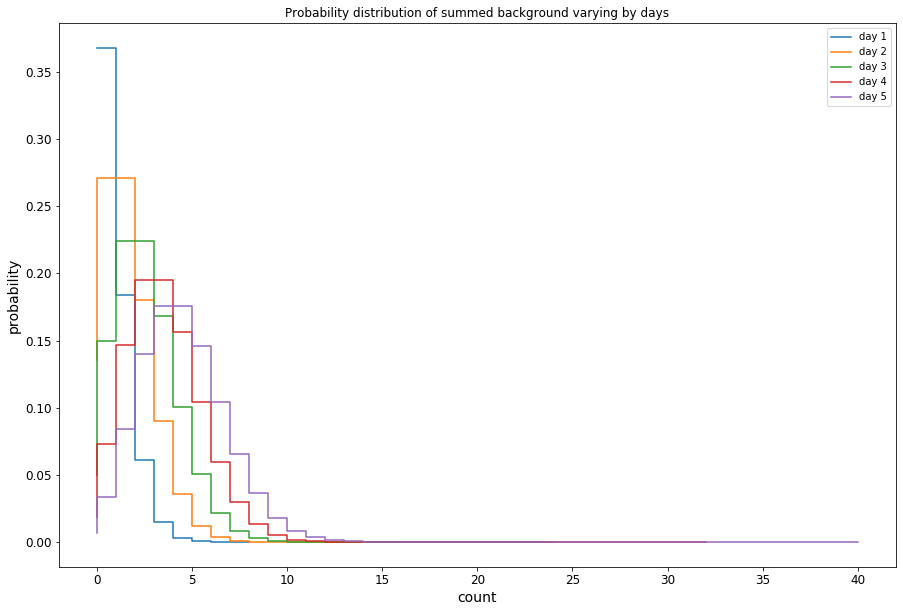

In [343]:
fig, ax = plt.subplots(1, 1)
#mu = 1 day average cosmic-ray background
mu = 1 
plt.rcParams["figure.figsize"] = (15, 10)
x = np.arange(stats.poisson.ppf(0.000001, mu),
              stats.poisson.ppf(0.999999, mu)) 
x2 = np.arange(x[0] * 2, x[-1] * 2 + 1)
x3 = np.arange(x2[0] + x[0], x2[-1] + x[-1] + 1)
x4 = np.arange(x3[0] + x[0], x3[-1] + x[-1] + 1)
x5 = np.arange(x4[0] + x[0], x4[-1] + x[-1] + 1)

day1_distribution = stats.poisson.pmf(x, mu)
ax.step(x, day1_distribution, ms=8, label='day 1')

day2_distribution = np.convolve(day1_distribution, day1_distribution)
ax.step(x2, day2_distribution, ms=8, label='day 2')

day3_distribution = np.convolve(day2_distribution, day1_distribution)
ax.step(x3, day3_distribution, ms=8, label='day 3')

day4_distribution = np.convolve(day3_distribution, day1_distribution)
ax.step(x4, day4_distribution, ms=8, label='day 4')

day5_distribution = np.convolve(day4_distribution, day1_distribution)
ax.step(x5, day5_distribution, ms=8, label='day 5')
plt.legend()
ax.set_xlabel("count", fontsize=14)
ax.set_ylabel("probability", fontsize=14)
plt.tick_params(labelsize=12)
ax.set_title('Probability distribution of summed background varying by days')

As explained above, below lies a plot of each day laid out individually to better accentuate their change in shape. (Note that the y-axis is not constant for the following images). Here, it is easier to see that the general shape of the distribution flattens and shifts to the right, as expected.

Text(0, 0.5, 'probability')

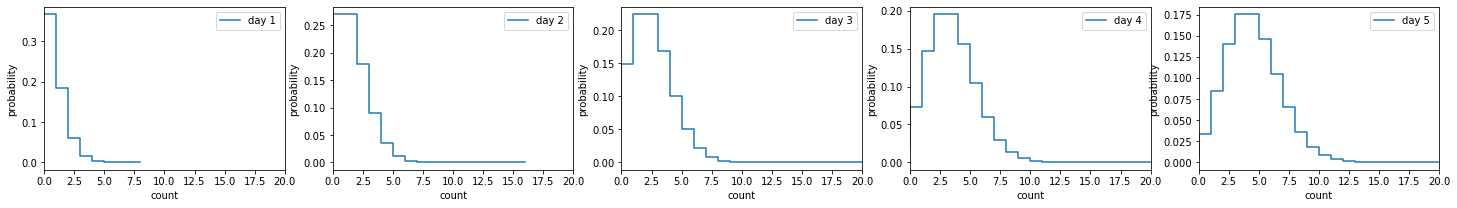

In [344]:
fig, ax = plt.subplots(1, 5, figsize=(25,3))
mu = 1
plt.setp(ax, xlim = (0, 20))
ax[0].step(x, day1_distribution, ms=8, label='day 1')
ax[0].legend()
ax[1].step(x2, day2_distribution, ms=8, label='day 2')
ax[1].legend()
ax[2].step(x3, day3_distribution, ms=8, label='day 3')
ax[2].legend()
ax[3].step(x4, day4_distribution, ms=8, label='day 4')
ax[3].legend()
ax[4].step(x5, day5_distribution, ms=8, label='day 5')
ax[4].legend()
ax[0].set_xlabel("count")
ax[0].set_ylabel("probability")
ax[1].set_xlabel("count")
ax[1].set_ylabel("probability")
ax[2].set_xlabel("count")
ax[2].set_ylabel("probability")
ax[3].set_xlabel("count")
ax[3].set_ylabel("probability")
ax[4].set_xlabel("count")
ax[4].set_ylabel("probability")

Finally, for added clarity, the y-axis is maintained in the next five images to better accentuate the change in the peak as the summed days increase in the plot below.

Text(0, 0.5, 'probability')

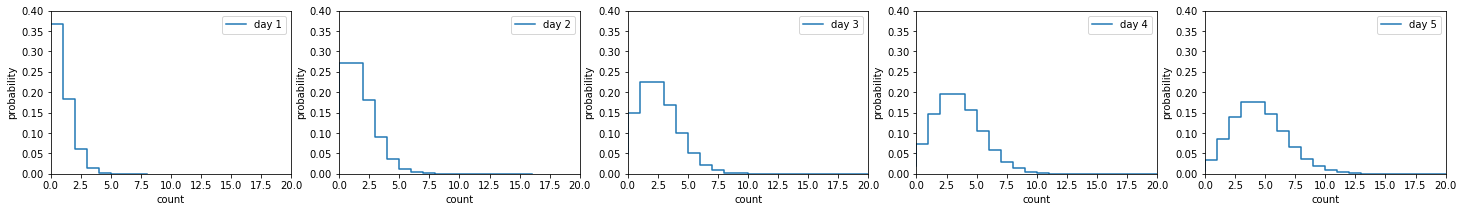

In [345]:
fig, ax = plt.subplots(1, 5, figsize=(25,3))
plt.setp(ax, xlim = (0, 20), ylim=(0, 0.4))
mu = 1
ax[0].step(x, day1_distribution, ms=8, label='day 1')
ax[0].legend()
ax[1].step(x2, day2_distribution, ms=8, label='day 2')
ax[1].legend()
ax[2].step(x3, day3_distribution, ms=8, label='day 3')
ax[2].legend()
ax[3].step(x4, day4_distribution, ms=8, label='day 4')
ax[3].legend()
ax[4].step(x5, day5_distribution, ms=8, label='day 5')
ax[4].legend()
ax[0].set_xlabel("count")
ax[0].set_ylabel("probability")
ax[1].set_xlabel("count")
ax[1].set_ylabel("probability")
ax[2].set_xlabel("count")
ax[2].set_ylabel("probability")
ax[3].set_xlabel("count")
ax[3].set_ylabel("probability")
ax[4].set_xlabel("count")
ax[4].set_ylabel("probability")

$\textbf{B)}$ Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

Conceptually, it makes sense that two Poisson distributions would also be a Poisson distribution because the distribution has an average over some time interval. In this case, I arbitrarily chose an average of 1 day average cosmic-ray background $X = 1$. If I combined this distribution with a different distribution that had a different average over the same time interval, we're left with a new average measurement over a new average time interval. Thus, the general property of being a Poisson distribution is preserved, it's parameters just change. 

Mathematically, the fact that the sum of two Poisson distributions is still a Poisson distribution is yielded through a fair bit of math. Suppose first that $X$ and $Y$ are independent Poisson variables with parameters $\lambda_1$, $\lambda_2$. Now, take $Z = X + Y$ and $\lambda = \lambda_1 + \lambda_2$

Now, $p_Z(z) = P(Z = z) = \sum_{j=0}^{z} P(X = j \ \& \ Y = z - j)$ where $z = X + Y$

Now, since $X$ and $Y$ are independent random variables, $p_Z(z) = \sum_{j=0}^{z} P(X = j)P(Y = z - j) = \sum_{j=0}^{z} \frac{e^{-\lambda_1}\lambda_1 ^j}{j!}\frac{e^{-\lambda_2}\lambda_2^{z-j}}{(z-j)!} = \sum_{j=0}^{z} \frac{1}{j!(z-j)!}e^{-\lambda_1}\lambda_1^j e^{-\lambda_2} \lambda_2^{z-j} = \sum_{j=0}^{z} \frac{z!}{j!(z-j)!}\frac{e^{-\lambda_1} \lambda_1^j e^{-\lambda_2} \lambda_2^{z-j}}{z!}$ 

$=\sum_{j=0}^{z}$ $\begin{pmatrix}z \\j \\\end{pmatrix}\frac{e^{-\lambda_1} \lambda_1^j e^{-\lambda_2}\lambda_2^{z-j}}{z!} = \frac{e^{-\lambda}}{z!}\sum_{j=0}^{z} \begin{pmatrix}z \\j \\\end{pmatrix} \lambda_1^{j} \lambda_2^{z-j} = \frac{e^{-\lambda}}{z!}(\lambda_1+\lambda_2)^{z}=\frac{e^{-\lambda}\lambda^{z}}{z!}$

Thus, $Z = X + Y$ is a Poisson, and we simply sum the parameters. It follows that for more than two independent Poisson random variables, this same process applies, you simply iterate through the summation two at a time until all independent variables are accounted for.


$\textbf{C)}$ Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.


Text(0.5, 1.0, 'Normal distribution functions of averaged background varying by days')

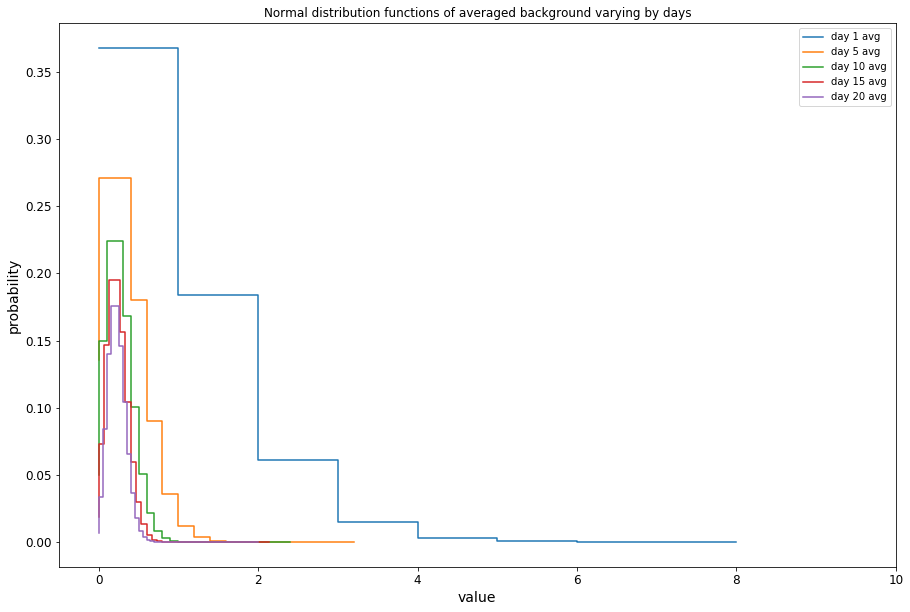

In [346]:
fig, ax = plt.subplots(1, 1)
mu = 1
plt.setp(ax, xlim = (-0.5, 10))

x = np.arange(stats.poisson.ppf(0.000001, mu),
              stats.poisson.ppf(0.999999, mu)) 
x2 = np.arange(x[0] * 5, (x[-1] * 2 + 1)) / 5
x3 = np.arange(x2[0], 5 * x2[-1] + x[-1] + 1) / 10
x4 = np.arange(x3[0], 10 * x3[-1] + x[-1] + 1) / 15
x5 = np.arange(x4[0], 15 * x4[-1] + x[-1] + 1) / 20
day1_distribution = stats.poisson.pmf(x, mu)
ax.step(x, day1_distribution, ms=8, label='day 1 avg')

day2_distribution = np.convolve(day1_distribution, day1_distribution)
ax.step(x2, day2_distribution, ms=8, label='day 5 avg')

day3_distribution = np.convolve(day2_distribution, day1_distribution)
ax.step(x3, day3_distribution, ms=8, label='day 10 avg')

day4_distribution = np.convolve(day3_distribution, day1_distribution)
ax.step(x4, day4_distribution, ms=8, label='day 15 avg')

day5_distribution = np.convolve(day4_distribution, day1_distribution)
ax.step(x5, day5_distribution, ms=8, label='day 20 avg')
plt.legend()
plt.tick_params(labelsize=12)
ax.set_xlabel("value", fontsize=14)
ax.set_ylabel("probability", fontsize=14)
ax.set_title('Normal distribution functions of averaged background varying by days')

Text(0, 0.5, 'probability')

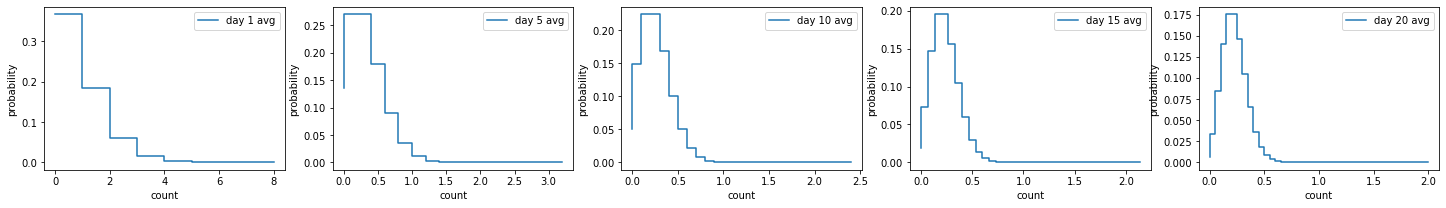

In [347]:
fig, ax = plt.subplots(1, 5, figsize =(25,3))
mu = 1
day1_distribution = stats.poisson.pmf(x, mu)
ax[0].step(x, day1_distribution, ms=8, label = 'day 1 avg')
ax[1].step(x2, day2_distribution, ms=8, label='day 5 avg')
ax[2].step(x3, day3_distribution, ms=8,label='day 10 avg')
ax[3].step(x4, day4_distribution, ms=8,label='day 15 avg')
ax[4].step(x5, day5_distribution, ms=8,label='day 20 avg')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[0].set_xlabel("count")
ax[0].set_ylabel("probability")
ax[1].set_xlabel("count")
ax[1].set_ylabel("probability")
ax[2].set_xlabel("count")
ax[2].set_ylabel("probability")
ax[3].set_xlabel("count")
ax[3].set_ylabel("probability")
ax[4].set_xlabel("count")
ax[4].set_ylabel("probability")

Once again, fixed y-axis below is shown to accentuate the 

Text(0, 0.5, 'probability')

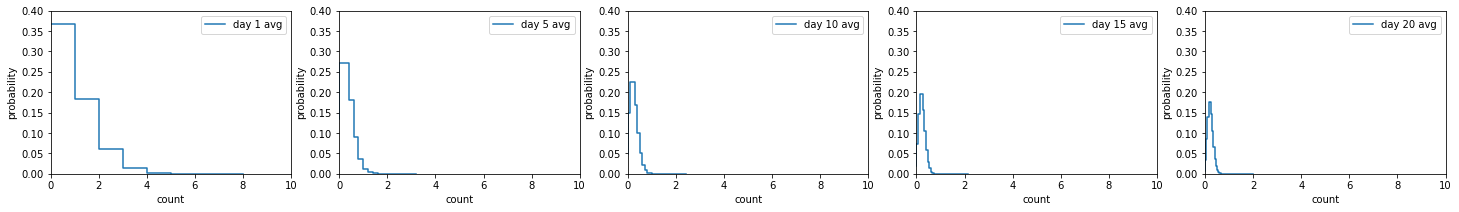

In [348]:
fig, ax = plt.subplots(1, 5, figsize =(25,3))
mu = 1
plt.setp(ax, xlim = (0, 10), ylim=(0, 0.4))
day1_distribution = stats.poisson.pmf(x, mu)
ax[0].step(x, day1_distribution, ms=8, label = 'day 1 avg')
ax[1].step(x2, day2_distribution, ms=8, label='day 5 avg')
ax[2].step(x3, day3_distribution, ms=8,label='day 10 avg')
ax[3].step(x4, day4_distribution, ms=8,label='day 15 avg')
ax[4].step(x5, day5_distribution, ms=8,label='day 20 avg')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[0].set_xlabel("count")
ax[0].set_ylabel("probability")
ax[1].set_xlabel("count")
ax[1].set_ylabel("probability")
ax[2].set_xlabel("count")
ax[2].set_ylabel("probability")
ax[3].set_xlabel("count")
ax[3].set_ylabel("probability")
ax[4].set_xlabel("count")
ax[4].set_ylabel("probability")

The central limit theorem states that "in many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed." This is consistent with the previous plots, we see the tail on the right becoming less and less prevelant, and the overall shape becoming a better approximation of a normal distribution. The shape also evolves similarly to part B, where we see the magnitude of the peak probability decreasing as the number of averaged days increases (while mean is constant). Ultimately, we see it becoming more and more symmetric as the number of averaged days increase.

$\textbf{D)}$ Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

For this example, I'll select N = 5, and Y = 4.

In [349]:
#N = 5, Y*N gamma rays from source
n = 5;
#y comes from problem setup, y>x, where x=mu 
y = 4;
mean = n * mu;
sum = n * y;

As the problem setup mandates, after 5 days with an average number of gamma rays emitted per day of 4. As such, the mean of our poisson distributed data will be $Y*N = 20$. The probability and associated sigma value for a count of 20 or greater is then simply equivalent to the following:

In [350]:
#one minus because interested in probability of 20 or more extreme, not the probability of up to 20
prob = 1 - stats.poisson.cdf(sum, mean);
z  = stats.poisson.ppf(1-prob, mu)
sigma = ((z - stats.poisson.mean(mu))/stats.poisson.std(mu))
print("The sigma value of such a measurement is " + str(sigma) + ", a detection.")

The sigma value of such a measurement is 9.0, a detection.


$\textbf{Problem 2}$

Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

$\textbf{A)}$ Show how the distribution changes as you average over more observing intervals.

$\textbf{B)}$ Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

Note: I did not plot the day 1 average, as it's very disruptive to the plot's x and y bounds.

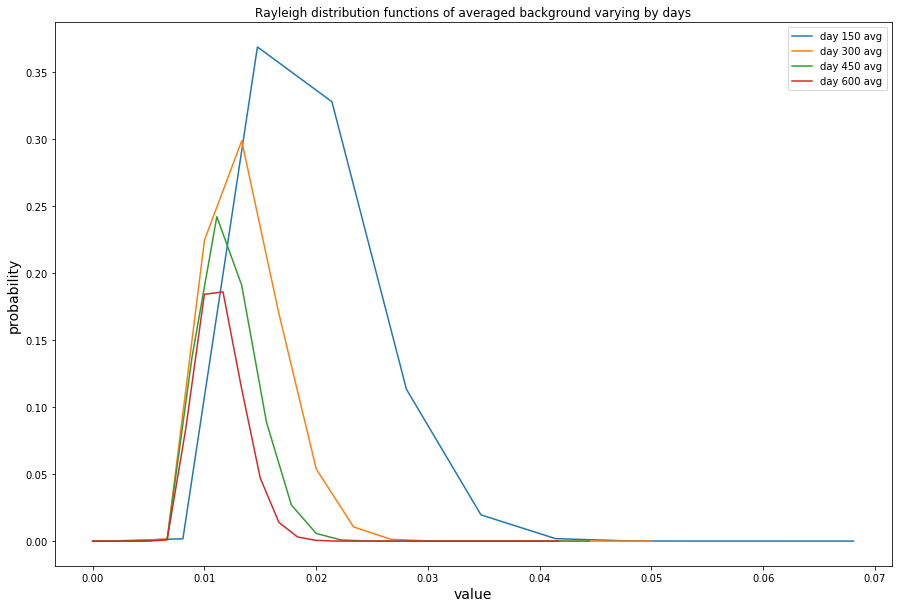

In [351]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.rayleigh.ppf(0.000001,0),
              stats.rayleigh.ppf(0.999999,0)) 
x2 = np.arange(x[0] * 150, (x[-1] * 2 + 1)) / 150
x3 = np.arange(x2[0] + x[0], 150 * x2[-1] + x[-1]) / 300
x4 = np.arange(x3[0] + x[0], 300 * x3[-1] + x[-1]) / 450
x5 = np.arange(x4[0] + x[0], 450 * x4[-1] + x[-1]) / 600

day1_distribution = stats.rayleigh.pdf(x)
day2_distribution = np.convolve(day1_distribution, day1_distribution)
ax.plot(x2, day2_distribution, ms=8, label='day 150 avg')
day3_distribution = np.convolve(day2_distribution, day1_distribution)
ax.plot(x3, day3_distribution, ms=8, label='day 300 avg')
day4_distribution = np.convolve(day3_distribution, day1_distribution)
ax.plot(x4, day4_distribution, ms=8, label='day 450 avg')
day5_distribution = np.convolve(day4_distribution, day1_distribution)
ax.plot(x5, day5_distribution, ms=8, label='day 600 avg')
ax.set_xlabel("value", fontsize=14)
ax.set_ylabel("probability", fontsize=14)
ax.set_title('Rayleigh distribution functions of averaged background varying by days')
plt.legend()
plt.show()

Unfortunately, I haven't found a satisfactory way to code this utilizing np.linspace for a smooth curve, or prove that it approaches a Gaussian distribution. However, as the trials increase it is clear that the leftmost side of the distribution does not vary much, while the skewed right side continues to get tucked in and become more symmetric. This leads me to believe that after sufficient trials, it is likely that it will eventually approach a near Gaussian distribution, but it would take thousands or possibly tens of thousands in order to lose most of its apparent skew and asymmetry.

$\textbf{Problem 3}$

The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.

We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.

$\textbf{Version 1}$

You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

$\textbf{A)}$ From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

Assume a gaussian distribution width of 14.9, and a signal of strength 85.2 floating point brightnesses. (Note that the Gaussian distribution is also in units of brightness). The probability of measuring this value of 85.2 or more extreme is then simply the following:

In [352]:
prob = 1 - stats.norm.cdf(85.2, 0, 14.9)
sigma = stats.norm.ppf(1 - prob)
print("The sigma value for a detection of 85.2 or greater is " + str(sigma))

The sigma value for a detection of 85.2 or greater is 5.718120805274191


Since a detection is traditionally 5-sigma or more, we can claim a detection, although it is fairly close to the cutoff point of 5-sigma.

$\textbf{Version 2}$

You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

$\textbf{B)}$ If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

The aforementioned probability distribution was described by a Gaussian distribution with mean = 0 and width = 14.9. However, now we have to look for a signal in 10k pixels, so we now have a multivariate probability distribution for 10k independent Gaussian's. What is the probability that at least 1 out of 10000 pixels measures a value of at least 85.2? To do this, we can simply do our calculations, but take the probability of each pixel and raise it to the power of the total number of pixels (10000 in this case).

In [353]:
prob = 1 - stats.norm.cdf(85.2, 0, 14.9)**10000
print("The probability of at least one pixel measuring a value of at least 85.2 is " + str(prob))

The probability of at least one pixel measuring a value of at least 85.2 is 5.3852829953737746e-05


$\textbf{C)}$ Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [354]:
sigma = stats.norm.ppf(1 - prob)
print("The sigma value associated with such a detection is therefore " + str(sigma))

The sigma value associated with such a detection is therefore 3.872543014221287


$\textbf{Problem 4}$

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to see ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

Let us again assume we have a Gaussian background (same parameters as Problem 3).

$\textbf{A)}$ Calculate the signal required for a 5-sigma detection in Version 1



In [355]:
prob = 1 - stats.norm.cdf(5, 0)
print("The probability of a 5 sigma detection is " + str(prob))

The probability of a 5 sigma detection is 2.866515719235352e-07


In [356]:
signal = stats.norm.ppf(1 - prob, 0, 14.9)
print("The signal required for a 5 sigma detection in this case is " + str(signal))

The signal required for a 5 sigma detection in this case is 74.49999999955563


$\textbf{B)}$ Calculate the signal required for a 5-sigma detection in Version 2

Since we are working backwards here, rather than raise the probability to a power of 10000, we must do the inverse to find the probability for each individual pixel out of that original 10000. As such, the calculation is as follows:

In [357]:
prob = 1 - stats.norm.cdf(5)**(1/10000)
print("The probability of a 5 sigma detection for at least one pixel is " + str(prob))

The probability of a 5 sigma detection for at least one pixel is 2.8665181339704304e-11


In [358]:
signal = stats.norm.ppf(1 - prob, 0, 14.9)
print("The signal required for a 5 sigma detection in this case is " + str(signal))

The signal required for a 5 sigma detection in this case is 97.60300855468567


$\textbf{C)}$ Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.


With a trials factor of 10000, the signal must be $\frac{97.6}{74.5} \approx 1.31$ times brighter for discovery. Intuitively, it seems like the penalty should be much higher than this. However, one must consider the shape of a Gaussian distribution. The 5 sigma detection in question is at a value already on the far sides of the Gaussian curve. At this point, any changes are going to be relatively inconsequential, as the probabilities in question are already so small. Secondly, one must consider that to get a 5 sigma detection in the first place is very difficult - the difference between one pixel out of 10000 measuring that value (Version B) and detecting a measurement with the method in Version A isn't that large. If the probability is already so small, repeated occurances are extremely unlikely, thus resulting in a relatively small sensitivity penalty between the two versions.

$\textbf{D)}$ If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

Below is a graph of the signal required at each order of magnitude, i.e $10^{0}, 10^{1}, 10^{2},\text{...}, 10^{x}$ 

Note that the x axis corresponds to a trial factor of ten to that power of x, i.e a $10^{4}$ trial factor is located at x = 4.

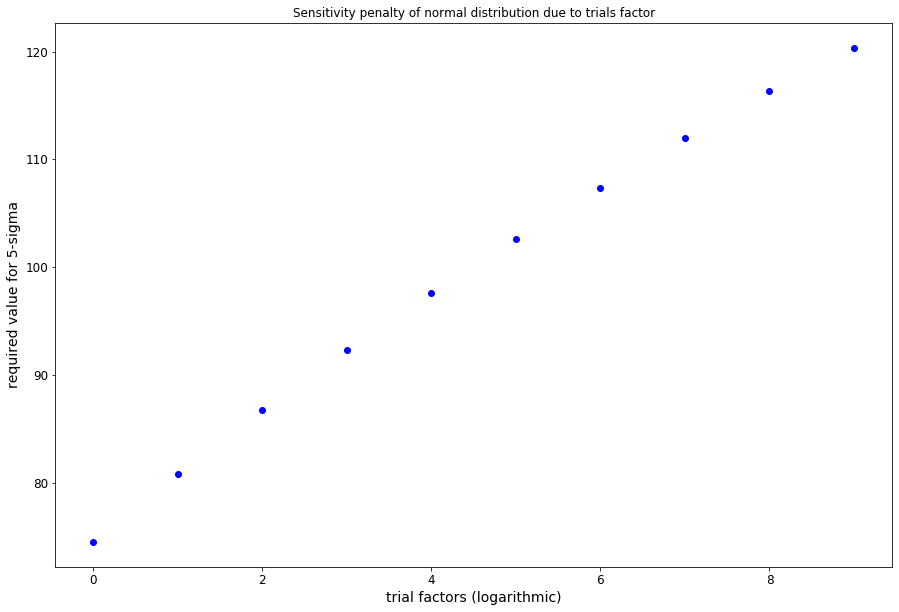

In [359]:
range = np.arange(0, 10)
prob = 1 - stats.norm.cdf(5)**(1/(10**range))
signals = stats.norm.ppf(1 - prob, 0, 14.9)
fig, ax = plt.subplots(1, 1)
ax.plot(signals, 'bo')
ax.set_ylabel("required value for 5-sigma", fontsize=14)
ax.set_xlabel("trial factors (logarithmic)", fontsize=14)
plt.tick_params(labelsize=12)
ax.set_title('Sensitivity penalty of normal distribution due to trials factor')
plt.show()

Unfortunately, there appears to be a rounding error at a certain order of magnitude, as shown below, thus constraining my graph to $10^{10}$ for the last problem.

In [360]:
range = np.arange(0, 13)
prob = 1 - stats.norm.cdf(5)**(1/(10**range))
signals = stats.norm.ppf(1 - prob, 0, 14.9)
print(signals)

[ 74.5         80.8613163   86.78303135  92.3442521   97.60300855
 102.60337057 107.37955339 111.96064338 116.3512317  120.34090796
          inf          inf          inf]


$\textbf{Extra credit}$: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.

Below is a plot showing the overlap between an exponential probability distribution and a standard normal probability distribution. As shown below, their parameters are set up so their means and standard deviations are identical. This allows us to examine the behavior of the two distributions in the region of interest, the fringes. In the following plot, it is clear that the normal distribution flatlines much faster than the exponential distribution. As explained in part C, the 5 sigma value in question lies in the far ends of the probability distribution. In a normal distribution, the region in question is near zero probability, and relatively non-changing, corresponding to a small change in sensitivity penalty with a higher trials factor. However, in that same region for the exponential probability distribution, it is clear that an increase in trials factor would have a much larger influence on the sensitivity penalty due to the fact that the probabilities in that region vary much more than they did in the normal distribution, as the distribution flatlines much less quickly than its normal distribution counterpart. 

The mean and standard deviation of the following normal distribution are 0.0 and 1.0 respectively.
The mean and standard deviation of the following exponential distribution are 0.0 and 1.0 respectively.


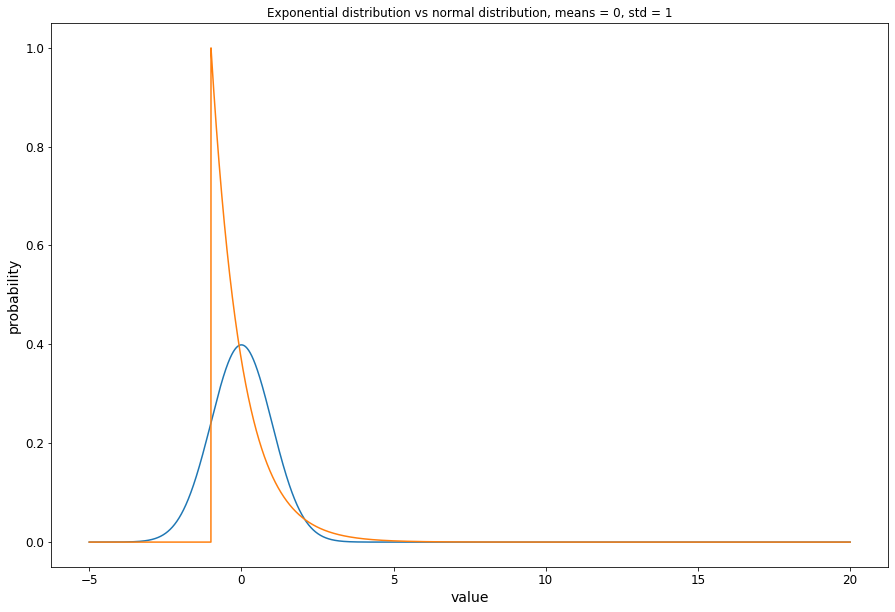

In [361]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-5,20,10000)
ax.plot(x, stats.norm.pdf(x, 0, 1))
ax.plot(x, stats.expon.pdf(x, -1, 1))
mean = stats.norm.mean(0, 1)
std = stats.norm.std(0, 1)
print("The mean and standard deviation of the following normal distribution are " + str(mean) + " and " + str(std) + " respectively.")
mean2 = stats.expon.mean(-1, 1)
std2 = stats.expon.std(-1, 1)
print("The mean and standard deviation of the following exponential distribution are " + str(mean2) + " and " + str(std2) + " respectively.")
ax.set_ylabel("probability", fontsize=14)
ax.set_xlabel("value", fontsize=14)
ax.set_title('Exponential distribution vs normal distribution, means = 0, std = 1')
plt.tick_params(labelsize=12)

As expected, the aforementioned behavior we anticipated by analyzing the shape and rate of change of the two different probability distributions is confirmed below. The exponential distribution does not flatline as quickly in the region of interest, thus leading to a larger influence on the sensitivity penalty than the normal distribution as shown below.

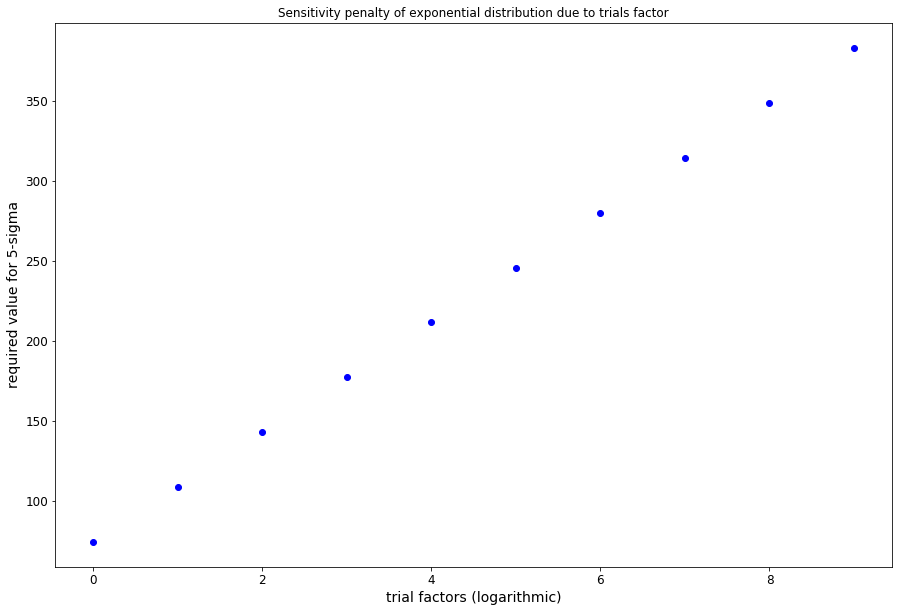

In [146]:
range = np.arange(0, 10)
prob = 1 - stats.expon.cdf(5)**(1/(10**range))
signals = stats.expon.ppf(1 - prob, 0, 14.9)
fig, ax = plt.subplots(1, 1)
ax.plot(signals, 'bo')
ax.set_ylabel("required value for 5-sigma", fontsize=14)
ax.set_xlabel("trial factors (logarithmic)", fontsize=14)
plt.tick_params(labelsize=12)
ax.set_title('Sensitivity penalty of exponential distribution due to trials factor')
plt.show()